 ## Predicting NBA Player Salary using Player Performance Data

### Business Problem:
Every year, the NBA increases salary cap for each team. This has lead to players signing contracts bigger than ever before. There are many rules and regulations that apply to player contracts, however, the main question that needs to be addressed is, are the players performing at the same level as their salary indicates?

### Project Goals:
The purpose of this project is to create a model that uses player statistics to predict a salary. This model will help team team owners and General Managers to further assess if any given player is truly worth the salary they are considering paying. In addition to team owners and GMs, future NBA players can use this model to gauge a cluster of statistic categories that they need to focus on in order to hit a certain dollar amount.

### The Data:
web crawling from basketball-reference.com to get player's performance data for 2013~2019

web crawling from espn.com to get player's salary data for 2013~2019

### Data Dictionary:
(+)means I think it is a positive factor for player's salary.

##### SALARY:salary
##### Player:player
##### Pos:Position
##### Age:Age of Player at the start of February 1st of that season.
##### Tm:Team
##### G:Games
##### MP:Minutes Played （＋）
##### FG:Field Goals Per 36 Minutes （＋）
##### FGA:Field Goal Attempts Per 36 Minutes 
##### FG% :Field Goal Percentage （＋）
##### 3P :3-Point Field Goals Per 36 Minutes（＋）
##### 3PA :3-Point Field Goal Attempts Per 36 Minutes
##### 3P% : FG% on 3-Pt FGAs.（＋）
##### 2P :2-Point Field Goals Per 36 Minutes（＋）
##### 2PA:2-Point Field Goal Attempts Per 36 Minutes
##### 2P%:FG% on 2-Pt FGAs.（＋）
##### FT :Free Throws Per 36 Minutes（＋）
##### FTA : Free Throw Attempts Per 36 Minutes
##### FT% : Free Throw Percentage（＋）
##### ORB : Offensive Rebounds Per 36 Minutes（＋）
##### DRB :Defensive Rebounds Per 36 Minutes（＋）
##### TRB :Total Rebounds Per 36 Minutes（＋）
##### AST : Assists Per 36 Minutes（＋）
##### STL : Steals Per 36 Minutes（＋）
##### BLK : Blocks Per 36 Minutes（＋）
##### TOV : Turnovers Per 36 Minutes（-）
##### PF : Personal Fouls Per 36 Minutes（-）
##### PTS : Points Per 36 Minutes（＋）
##### PER:Player Efficiency Rating（＋）
A measure of per-minute production standardized such that the league average is 15.
##### TS%:True Shooting Percentage（＋）
A measure of shooting efficiency that takes into account 2-point field goals, 3-point field goals, and free throws.
##### 3PAr:3-Point Attempt Rate
Percentage of FG Attempts from 3-Point Range
##### FTr:Free Throw Attempt Rate
Number of FT Attempts Per FG Attempt
##### ORB%:Offensive Rebound Percentage
An estimate of the percentage of available offensive rebounds a player grabbed while he was on the floor.
##### DRB%:Defensive Rebound Percentage
An estimate of the percentage of available defensive rebounds a player grabbed while he was on the floor.
##### TRB%:Total Rebound Percentage
An estimate of the percentage of available rebounds a player grabbed while he was on the floor.
##### AST%:Assist Percentage
An estimate of the percentage of teammate field goals a player assisted while he was on the floor.
##### STL%:Steal Percentage
An estimate of the percentage of opponent possessions that end with a steal by the player while he was on the floor.
##### BLK%:Block Percentage
An estimate of the percentage of opponent two-point field goal attempts blocked by the player while he was on the floor.
##### TOV%:Turnover Percentage
An estimate of turnovers committed per 100 plays.
##### USG%:Usage Percentage
An estimate of the percentage of team plays used by a player while he was on the floor.
##### OWS:Offensive Win Shares
An estimate of the number of wins contributed by a player due to his offense.
##### DWS:Defensive Win Shares
An estimate of the number of wins contributed by a player due to his defense.
##### WS :Win Shares
An estimate of the number of wins contributed by a player.
##### WS/48 :Win Shares Per 48 Minutes
An estimate of the number of wins contributed by a player per 48 minutes (league average is approximately .100)
##### OBPM:Offensive Box Plus/Minus
A box score estimate of the offensive points per 100 possessions a player contributed above a league-average player, translated to an average team.
##### DBPM:Defensive Box Plus/Minus
A box score estimate of the defensive points per 100 possessions a player contributed above a league-average player, translated to an average team.
##### BPM :Box Plus/Minus
A box score estimate of the points per 100 possessions a player contributed above a league-average player, translated to an average team.
##### VORP :Value over Replacement Player
A box score estimate of the points per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season.
Multiply by 2.70 to convert to wins over replacement.

In [21]:
#載入需要套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
#讀入我爬蟲完 存好的檔案
df = pd.read_csv('df_merge')
df.drop('Unnamed: 0', inplace=True, axis=1)

In [23]:
#bringing salary column to front of dataframe
cols = df.columns.tolist()
cols = cols[50:] + cols[:50]
df = df[cols]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 51 columns):
SALARY    2656 non-null float64
Player    2656 non-null object
Pos       2656 non-null object
Age       2656 non-null float64
Tm        2656 non-null object
G         2656 non-null float64
GS        2656 non-null float64
MP        2656 non-null float64
FG        2656 non-null float64
FGA       2656 non-null float64
FG%       2656 non-null float64
3P        2656 non-null float64
3PA       2656 non-null float64
3P%       2656 non-null float64
2P        2656 non-null float64
2PA       2656 non-null float64
2P%       2656 non-null float64
FT        2656 non-null float64
FTA       2656 non-null float64
FT%       2656 non-null float64
ORB       2656 non-null float64
DRB       2656 non-null float64
TRB       2656 non-null float64
AST       2656 non-null float64
STL       2656 non-null float64
BLK       2656 non-null float64
TOV       2656 non-null float64
PF        2656 non-null float64


In [25]:
#drop incorrect outliner
df = df.drop(df[df['PTS']>80].index)

In [26]:
#dropping categorical values in df so I can start a model
df_values = df.drop(['Player', 'TEAM', 'Pos', 'Year','Tm'], axis=1)

In [27]:
df.head()

,SALARY,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,TEAM
0,665000.0,Quincy Acy,PF,22.0,TOR,29.0,0.0,342.0,4.4,7.9,...,14.7,0.7,0.4,1.1,0.157,-0.6,1.3,0.7,0.2,Toronto Raptors
1,916099.0,Jeff Adrien,PF,26.0,CHA,52.0,5.0,713.0,3.6,8.5,...,15.6,0.5,0.4,1.0,0.064,-3.0,-0.2,-3.3,-0.2,Charlotte Bobcats
2,7750000.0,Arron Afflalo,SF,27.0,ORL,64.0,64.0,2307.0,6.2,14.1,...,22.5,1.5,0.5,2.0,0.042,-0.3,-2.0,-2.3,-0.2,Orlando Magic
3,473604.0,Josh Akognon,PG,26.0,DAL,3.0,0.0,9.0,8.0,16.0,...,20.3,0.0,0.0,0.0,0.196,4.7,-4.9,-0.2,0.0,Dallas Mavericks
4,2445480.0,Cole Aldrich,C,24.0,TOT,45.0,0.0,388.0,4.1,7.4,...,12.7,0.1,0.4,0.6,0.070,-4.8,0.7,-4.0,-0.2,Sacramento Kings


### 首先探索一下資料間的關係 Exploratory Data Analysis

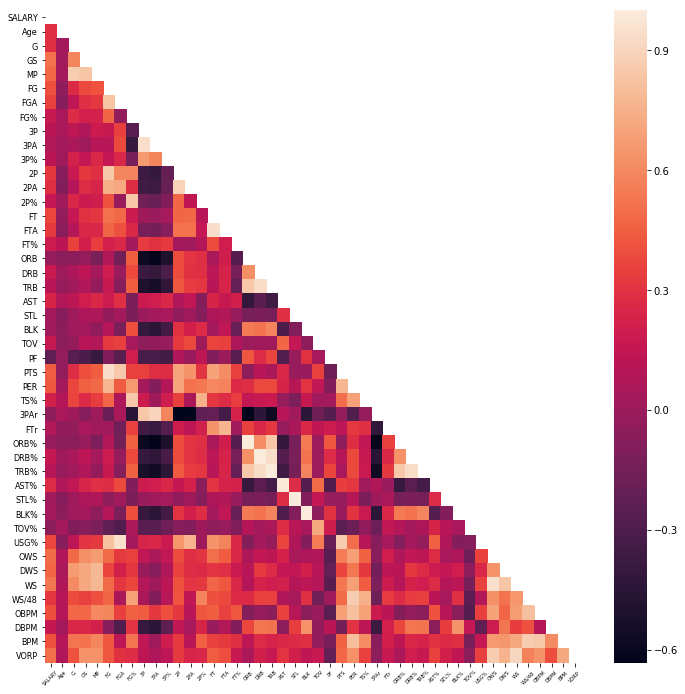

In [29]:
#畫Heatmap圖 以看各種類之間的相關性

def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12,12))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=False)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=5, rotation=45)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=8, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()
    
correlation_heat_map(df_values)

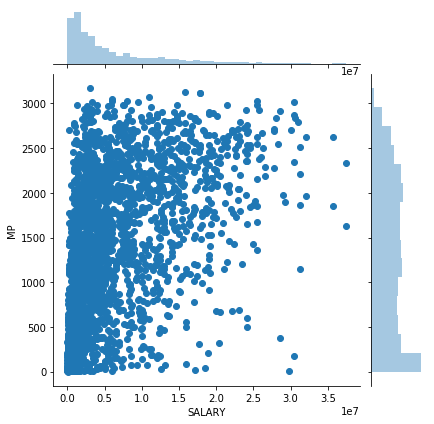

In [30]:
sns.jointplot(df_values.SALARY, df_values['MP'])
plt.show()

對球員上場時間以及薪水 畫圖
我認為通常一個選手在場上打球越久 代表他可以為球隊帶來比較高的價值 故應該薪水也會較高

可以發現大致仍呈現正相關 
然而卻也有許多球員在場上時間很長但薪水也未必較高的情形發生

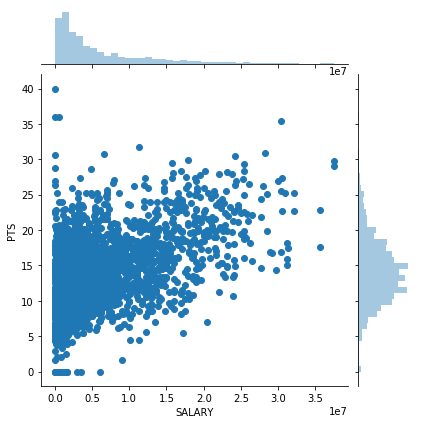

In [31]:
sns.jointplot(df_values.SALARY, df_values['PTS'])
plt.show()

對球員薪水以及他們的得分表現 畫圖
可以發現大致仍呈現正相關
因此得分仍是一個相當好可以拿來預測薪水的一項因子

##### Salary distributed across Positions
These plots have given me a good idea of a few of the variables that would have strong correlations with Salary. Next, I’d like to take a look at how Salary is being broken down over the different positions.

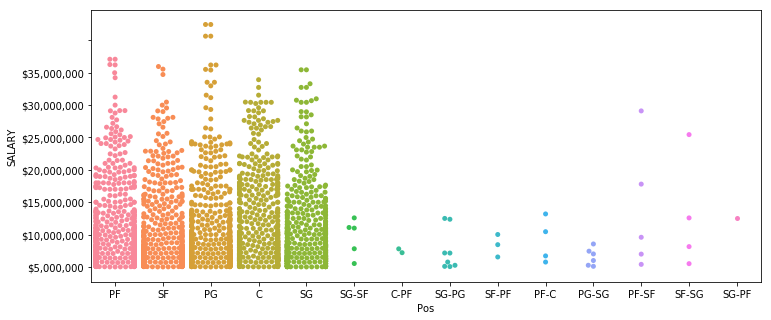

In [32]:
fig, ax = plt.subplots(figsize=(12,5))
sns.swarmplot(df.Pos, df.SALARY, edgecolor='white')
ax.set_yticklabels(['$0', '$5,000,000', '$10,000,000', '$15,000,000', '$20,000,000', '$25,000,000', '$30,000,000', '$35,000,000'])

plt.show()


對球員位置與薪水作圖 

##### Total Money Spent on Salary in 2013～2019 each team
Now that I have a good idea of how Salary is being distributed among the different positions and some of the categories that are highly correlated with Salary, I’d like to take a look at how much money the NBA teams have spent on their players in the past 7 years.

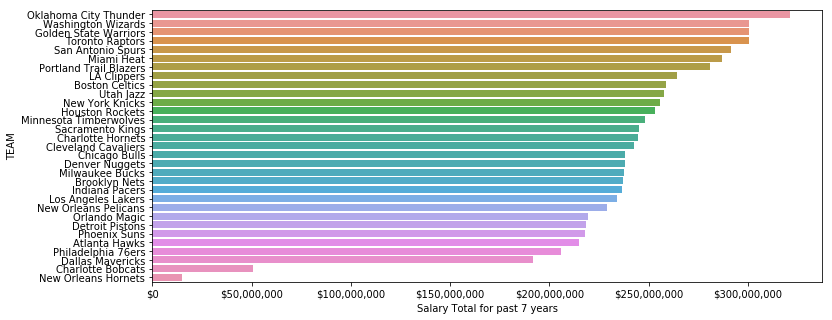

In [33]:
team_sals = df.groupby("TEAM").agg(np.sum).sort_values('SALARY', ascending=False).reset_index().iloc[1::]
# colors=sns.color_palette("hls", 10)
fig, ax = plt.subplots(figsize=(12,5))

ax.set_xticklabels(['$0', '$50,000,000', '$100,000,000', '$150,000,000', '$200,000,000', '$250,000,000', '$300,000,000', '$350,000,000', '$400,000,000'])
sns.barplot(x=team_sals.SALARY, y=team_sals.TEAM, ax=ax)

ax.set_xlabel('Salary Total for past 7 years')


plt.show()


各球隊的球員薪水總和花費 可以發現前幾名大多為城市 

然後最後兩名球隊薪水總和會那麼少 應該是因為我在合併資料框時被遺漏掉的資料

也可以特別注意 在球員薪水花費很多但球隊勝率卻不好的球隊

#### 開始套迴歸模型
To start off, I set two variables. My target variable was Salary and my predictor variable was all the statistical categories. I then normalized all my predictor variables by using the sklearn.preprocessing.StandardScaler library. I used the sklearn.model_selection.train_test_split method to subset my data. 70% of my data was used as a training set and the remaining 30% was used as the test set. I ran 4 different regression models on my data; Linear, Lasso, Ridge, and ElasticNet regression.

#### Splitting data for modeling

In [34]:
#salary is target
#everything else is predictors
y = df_values.SALARY.values
X = df_values.iloc[:,1:]

In [35]:
ss = StandardScaler()

# use the "fit_transform" function to normalize the X design matrix
Xn = ss.fit_transform(X)

In [36]:
#splitting data 70:30
Xtrain, Xtest, ytrain, ytest = train_test_split(Xn, y, test_size=0.3)

#### Basic Linear Regression Model¶

In [37]:
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, Xtrain, ytrain, cv=5)

print (linreg_scores)
print (np.mean(linreg_scores))

[0.52597471 0.45660512 0.40968036 0.48778693 0.47954228]
0.47191787852276146


In [38]:
linreg.fit(Xtrain, ytrain)
linreg.score(Xtest, ytest)

0.46325888728208575

In [39]:
lr_coef_df        =   pd.DataFrame(linreg.coef_, columns=["linear_coef"])
lr_coef_df.index  =   X.columns

#creating df to look at coefs
linreg_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':linreg.coef_,
                            'abs_coef':np.abs(linreg.coef_)})

linreg_coefs.sort_values('abs_coef', inplace=True, ascending=False)

linreg_coefs

,variable,coef,abs_coef
5,FGA,-2.170345e+07,2.170345e+07
31,TRB%,-1.402057e+07,1.402057e+07
25,PER,-1.309722e+07,1.309722e+07
11,2PA,1.250681e+07,1.250681e+07
8,3PA,8.967135e+06,8.967135e+06
17,DRB,8.696909e+06,8.696909e+06
30,DRB%,7.738395e+06,7.738395e+06
24,PTS,7.012452e+06,7.012452e+06
18,TRB,-6.470864e+06,6.470864e+06
39,WS,6.302594e+06,6.302594e+06


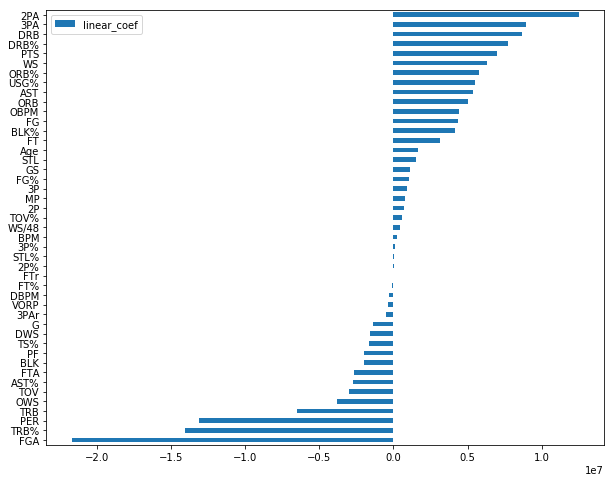

In [40]:
lr_coef_df.sort_values("linear_coef").plot(kind="barh", figsize=(10,8))

以上圖為 Basic Linear Regression 各係數的作圖 正係數因素主要都被歸到得分相關的種類
雖然有些因素的係數是負的 看似不合理
但 cross validated score 大概有 0.48 也仍算是個表現還可以的模型

#### Ridge model

In [41]:
ridge_alphas = np.logspace(-2, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(Xtrain, ytrain)

print( optimal_ridge.alpha_)

1.096985797892384


In [42]:
#cross validating using ridge on training data
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xtrain, ytrain, cv=5)

print (ridge_scores)
print (np.mean(ridge_scores))

[0.53190291 0.45819941 0.43044174 0.48986932 0.48344035]
0.4787707461729337


In [43]:
#checking score on test data
ridge.fit(Xtrain, ytrain)
ridge.score(Xtest, ytest)

0.45938186355511135

In [44]:
ridge_coef_df        =   pd.DataFrame(ridge.coef_, columns=["ridge_coef"])
ridge_coef_df.index  =   X.columns

In [45]:
#creating df to look at coefs
ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('coef', inplace=True, ascending=False)

ridge_coefs

,variable,coef,abs_coef
19,AST,3.872455e+06,3.872455e+06
24,PTS,3.785325e+06,3.785325e+06
34,BLK%,3.678803e+06,3.678803e+06
4,FG,3.450545e+06,3.450545e+06
13,FT,2.955454e+06,2.955454e+06
17,DRB,2.402859e+06,2.402859e+06
41,OBPM,2.120245e+06,2.120245e+06
16,ORB,1.890645e+06,1.890645e+06
36,USG%,1.885652e+06,1.885652e+06
0,Age,1.700215e+06,1.700215e+06


In [46]:
ridge_coef_df = pd.DataFrame(optimal_ridge.coef_, columns=["ridge_coef"])
ridge_coef_df.index = X.columns

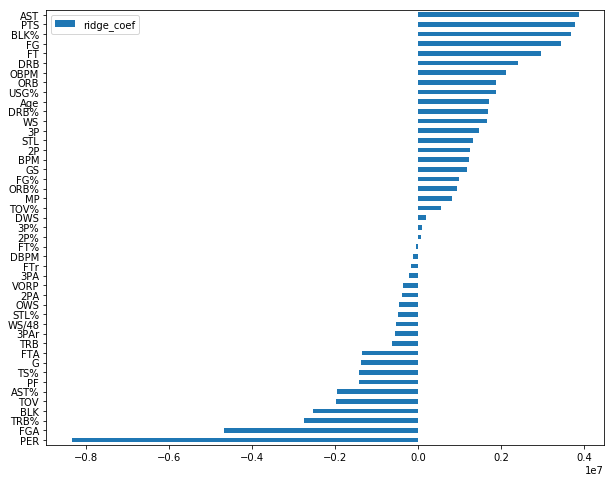

In [47]:
ridge_coef_df.sort_values("ridge_coef").plot(kind="barh", figsize=(10,8))

Ridge regression 似乎對於各因子的權重較平衡一些 例如說籃板 助攻等

The ridge model 表現較符合我們直覺 field goal,助攻,被球隊使用的頻率,火鍋比率,進攻籃板 為正係數的前五名

因為 Rebounds, Assists, and Points 是籃球最主要的三項數據 因此也合理用這些種類表現去預測一個球員的薪水

最後 cross validated score 大概有 0.48 跟basic linear regression表現得差不多

但意思詮釋在我看來 Ridge regression 表現較佳

#### Lasso model

In [48]:
#finding optimal lasso alpha
optimal_lasso = LassoCV(n_alphas=1000, cv=5, verbose=1, n_jobs=-1)
optimal_lasso.fit(Xtrain, ytrain)

print (optimal_lasso.alpha_)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

3580.4770398964138


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [49]:
#cross validating using lasso on training data
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xtrain, ytrain, cv=5)

print (lasso_scores)
print (np.mean(lasso_scores))

[0.53234502 0.45812    0.42929643 0.48823806 0.48435675]
0.47847125343872676


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [50]:
lasso.fit(Xtrain, ytrain)
lasso.score(Xtest, ytest)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.45669174826919035

In [51]:
#creating df to look at coefs
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs

,variable,coef,abs_coef
25,PER,-7.300705e+06,7.300705e+06
4,FG,4.939031e+06,4.939031e+06
34,BLK%,3.463052e+06,3.463052e+06
19,AST,3.277142e+06,3.277142e+06
5,FGA,-2.909578e+06,2.909578e+06
13,FT,2.855465e+06,2.855465e+06
21,BLK,-2.534453e+06,2.534453e+06
24,PTS,2.149024e+06,2.149024e+06
41,OBPM,1.870087e+06,1.870087e+06
0,Age,1.710388e+06,1.710388e+06


In [52]:
#Lasso cancels out 33% of features.
print ('Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(Xtrain.shape[1]))

Percent variables zeroed out: 0.15555555555555556


In [53]:
lasso_coef_df        =   pd.DataFrame(lasso.coef_, columns=["lasso_coef"])
lasso_coef_df.index  =   X.columns

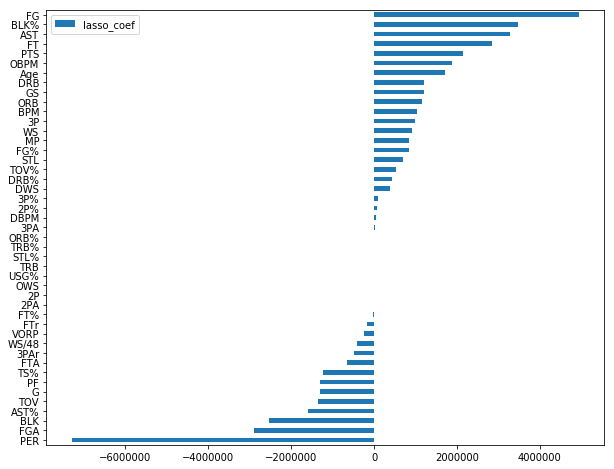

In [54]:
lasso_coef_df.sort_values("lasso_coef").plot(kind="barh", figsize=(10,8))

Lasso regression model 將太多 variables 都變成0了

將15%的種類的詮釋效力都變成0

The lasso model is also performing very similar to the Linear Regression and Ridge models with a score of 0.49.

#### Plotting all my residuals on one plot¶

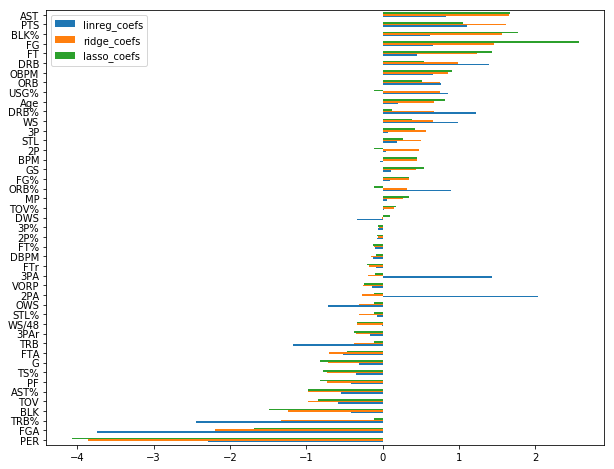

In [55]:
all_coefs = lr_coef_df.join([ridge_coef_df, lasso_coef_df])
all_coefs_ss = ss.fit_transform(all_coefs)
all_coefs_ss_df = pd.DataFrame(all_coefs_ss, columns=['linreg_coefs', 'ridge_coefs', 'lasso_coefs'])
all_coefs_ss_df.index = all_coefs.index
all_coefs_ss_df.sort_values("ridge_coefs", ascending=True).plot(kind="barh", figsize=(10, 8))

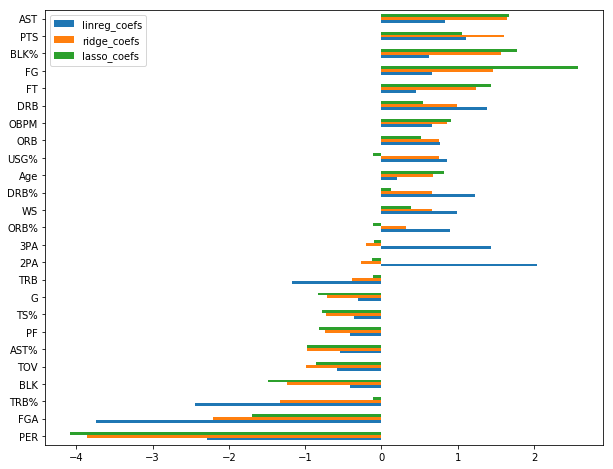

In [56]:
mask = all_coefs_ss_df.apply(lambda row: any(row.abs().values > 0.75), axis=1)
all_coefs_ss_df[mask].sort_values("ridge_coefs", ascending=True).plot(kind="barh", figsize=(10, 8))

This plot is showing the weight that each model is putting on the different categories. The bar plot above has been masked to only show the categories where one of the models is weighting a category over 0.75. Categories with weights less than 0.75 are not shown.

#### ElasticNet model

In [57]:
#finding optimal enet alpha and l1 ratio
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5,
                            verbose=1)
optimal_enet.fit(Xtrain, ytrain)

print (optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

................................................................................................................................................................................................................................................................................................../anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
./anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
./anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to incre

3548.001205589361
1.0


................................................................................/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
./anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
./anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
./anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: Conve

In [58]:
#cross validating enet with training data
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, Xtrain, ytrain, cv=5)

print (enet_scores)
print( np.mean(enet_scores))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[0.53236217 0.45805609 0.42930871 0.48831648 0.48433757]
0.4784762051657367


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [59]:
# Need to fit the ElasticNet and Ridge outside of cross_val_score like i did with the ridge
ridge.fit(Xtrain, ytrain)
enet.fit(Xtrain, ytrain)
lasso.fit(Xtrain, ytrain)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=3580.4770398964138, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet model is weighting the L1 ratio at 1.0.

This 1.0 L1 ratio essentially makes the ENet model the same as the Lasso Regression model.

#### Plotting residuals

In [60]:
# model residuals:

ridge_resid = ytrain - ridge.predict(Xtrain)
lasso_resid = ytrain - lasso.predict(Xtrain)
enet_resid = ytrain - enet.predict(Xtrain)

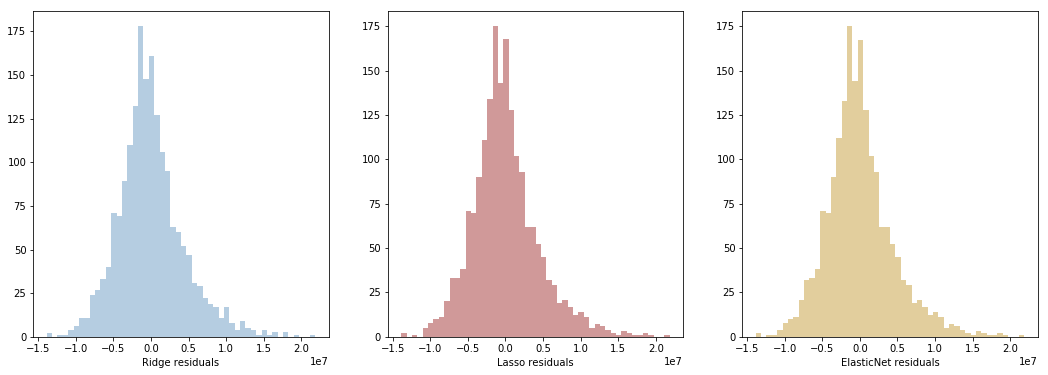

In [61]:
fig, axarr = plt.subplots(1, 3, figsize=(18, 6))

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='steelblue', ax=axarr[0], axlabel='Ridge residuals')

sns.distplot(lasso_resid, bins=50, hist=True, kde=False, 
             color='darkred', ax=axarr[1], axlabel='Lasso residuals')

sns.distplot(enet_resid, bins=50, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[2], axlabel='ElasticNet residuals')

plt.show()

My residual plots are all pretty much the same considering my scores were all around the same as well.

### Regression Models summary:
All four of the models are scoring around the same with a score of about 0.45.

The ridge regression model makes the most sense intuitively because it is weighting the statistical categories uniformly rather than putting a heavy weight on just one or two categories like the linear regression did.

Also the Ridge handles the multicollinearity of my dataset a lot better than the Lasso does. The ridge weights all the categories appropriately while the Lasso completely zeroes out 15% my predictors, many of which are important to consider when predicting salary.

### 因此總結我最後用 ridge regression model 來預測球員的薪水

### 現在來看用模型預測出來薪水被高估以及被低估的球員

In [62]:
df_values['Predicted'] = ridge.predict(Xn)

In [63]:
pred_df = df_values[['SALARY', 'Predicted']]

In [64]:
pred_df['sal_difference'] = pred_df['SALARY'] - pred_df['Predicted']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
pred_df = pd.concat([pred_df, df.iloc[:,1:]], axis=1)

In [66]:
pred_df = pred_df[['Player', 'Year', 'SALARY', 'Predicted', 'sal_difference']]

In [67]:
pred_df['abs_diff'] = np.abs(pred_df['sal_difference'])

In [68]:
pred_df = pred_df.sort_values('abs_diff', ascending=True)

#### 這邊為薪水被低估的前20名球員

In [69]:
pred_df.head(20)

,Player,Year,SALARY,Predicted,sal_difference,abs_diff
1460,Mike Scott,2016,3333333.0,3.333327e+06,5.752103,5.752103
1964,Bojan Bogdanovic,2018,10500000.0,1.050011e+07,-111.795047,111.795047
1095,Isaiah Thomas,2015,7238606.0,7.239455e+06,-848.825797,848.825797
45,Trevor Booker,2013,2350820.0,2.357069e+06,-6249.084126,6249.084126
730,D.J. White,2014,104028.0,9.683005e+04,7197.946700,7197.946700
1902,Okaro White,2017,210995.0,2.186001e+05,-7605.078494,7605.078494
1134,Dorell Wright,2015,3150000.0,3.158408e+06,-8408.149506,8408.149506
701,Mirza Teletovic,2014,3229050.0,3.220518e+06,8531.986317,8531.986317
3,Josh Akognon,2013,473604.0,4.650330e+05,8571.005623,8571.005623
2267,Nick Young,2018,5192000.0,5.201258e+06,-9257.661033,9257.661033


#### 這邊為薪水被高估的前20名球員

In [70]:
pred_df.tail(20)

,Player,Year,SALARY,Predicted,sal_difference,abs_diff
2524,Paul Millsap,2019,29230769.0,1.450175e+07,1.472902e+07,1.472902e+07
2637,Russell Westbrook,2019,35654150.0,2.080073e+07,1.485342e+07,1.485342e+07
695,Amar'e Stoudemire,2014,21679893.0,6.396745e+06,1.528315e+07,1.528315e+07
1605,Allen Crabbe,2017,18500000.0,3.080353e+06,1.541965e+07,1.541965e+07
2129,Kyle Lowry,2018,31200000.0,1.566782e+07,1.553218e+07,1.553218e+07
2641,Andrew Wiggins,2019,25467250.0,9.658776e+06,1.580847e+07,1.580847e+07
1811,Chandler Parsons,2017,22116750.0,5.858913e+06,1.625784e+07,1.625784e+07
2497,Kyle Lowry,2019,31200000.0,1.471684e+07,1.648316e+07,1.648316e+07
2054,Blake Griffin,2018,32088932.0,1.529025e+07,1.679868e+07,1.679868e+07
2360,Stephen Curry,2019,37457154.0,2.065751e+07,1.679964e+07,1.679964e+07


Model is performing most accurately on the players who are new to the NBA.

Model is least accurate at predicting salary for players who have been in the NBA for many years and can be considered "super stars"

#### Plotting actual salary vs. predicted salary using training and testing data

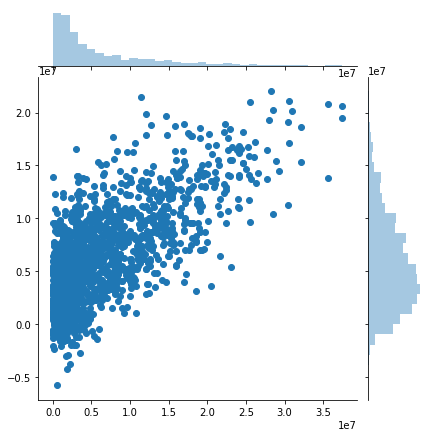

In [71]:
salary_pred = ridge.predict(Xtrain)
sns.jointplot(ytrain, salary_pred)

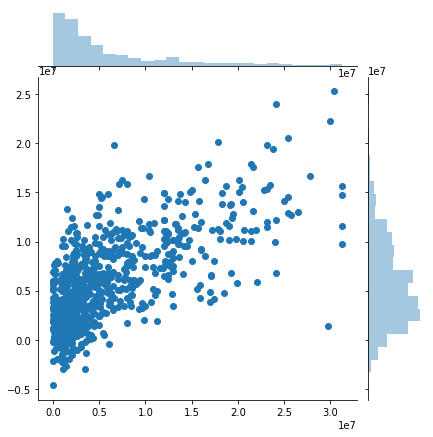

In [72]:
salary_pred1 = ridge.predict(Xtest)
sns.jointplot(ytest, salary_pred1)

### 現在我們就可以將一個球員的球場數據輸入到模型裡面 讓模型根據他的表現來預測薪水了

In [73]:
X.columns

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

#### 作法如下
my_player = ["輸入想要被預測球員的數據表現"]

my_player = np.array([my_player])

my_player = ss.fit_transform(my_player)

ridge.predict(my_player)


In [84]:
player_value= [ 26.0,  3.0, 0.0, 9.0, 8.0,
       16.0, 0.5, 4.0, 8.0, 0.5, 4.0, 8.0, 0.5, 0.0, 0.0, 0.0, 0.0, 4.0,
       4.0, 4.0, 0.0, 0.0, 0.0, 12.0, 20.0,  15.3, 0.625, 0.5, 0.0,
       0.0, 12.1, 6.2, 19.4, 0.0, 0.0, 0.0, 20.3, 0.0, 0.0, 0.0, 0.196,
       4.7, -4.9, -0.2, 0.0, ]
 

In [85]:
my_player = player_value #["輸入想要被預測球員的數據表現"]

my_player = np.array([my_player])

my_player = ss.fit_transform(my_player)

ridge.predict(my_player)

array([5786213.98420902])

5786213.98420902即是透過模型預測出來球員的薪水

(array([ 10., 215., 735., 702., 505., 285., 134.,  48.,  18.,   3.]),
 array([-5776748.41422122, -2669440.80229329,   437866.80963464,
         3545174.42156257,  6652482.0334905 ,  9759789.64541843,
        12867097.25734637, 15974404.8692743 , 19081712.48120223,
        22189020.09313016, 25296327.70505809]),
 <a list of 10 Patch objects>)

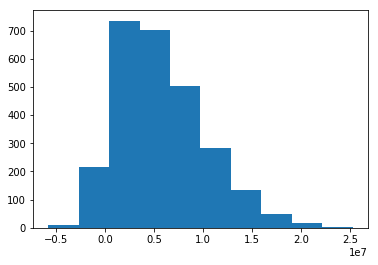

In [81]:
plt.hist(pred_df["Predicted"])

被預測薪水的分佈圖